## Packages

In [2]:
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## Parameters and Main Functions

In [3]:
N1 = 5000
N = 10000
gamma = .1
chat1 = .02
chat2 = .01
N2 = 5000
b0 = 0.0235
c12 = .005
a = 1

In [4]:
#equation1
def a_equation1(i,j,a21,a22):
    a1=  (a21*b0)/(2*a)
    
    return ((a1*b0)/N)*(i*i*i) + ((a1*b0)*(j/N) - b0*chat1 - a1*b0*(N1/N))*(i*i) + (b0*chat1*N1 - b0*a1*j*(N1/N) - b0*c12*j + 1 - gamma)*i + (b0 * c12*j*N1)

In [5]:
#equation2
def a_equation2(i,j,a21,a22):
    
    a2= (a22*b0)/(2*a)
    return ((a2*b0)/N)*(j*j*j) + ((a2*b0)*(i/N) - b0*chat2 - a2*b0*(N2/N))*(j*j) + (b0*chat2*N2 - b0*a2*i*(N2/N) - b0*c12*i + 1 - gamma)*j + (b0 * c12*i*N2)

In [6]:
def a_recalc_ij(i,j, a21,a22):
            
    
    i_temp = a_equation1(i,j,a21,a22)
    j_temp = a_equation2(i,j,a21,a22)
    
    if i_temp < 0: i_temp = 0
    if i_temp > N1: i_temp = N1
    if j_temp < 0: j_temp = 0
    if j_temp > N2: j_temp = N2
         
    i = i_temp
    j = j_temp
    return i,j

In [7]:
# creates a seperate graph for old and young populations
def calcA(topMaxNUM = 51):
    
    iterationNUM = 600
    topMax = topMaxNUM
    i = 1
    j = 1
    
    array = []
    a_values_young = pd.DataFrame(index=range(0,topMax), columns=range(0,topMax))
    a_values_old = pd.DataFrame(index=range(0,topMax), columns=range(0,topMax))
    
    #rows are a21
    for a21 in range(0,topMax):
         #coloumns are a22
        for a22 in range(0,topMax):
                 #fill in only the top half of the grid
                #if a22 <= a21:
                    i_values = []
                    j_values = []
                    for iterations in range(iterationNUM):
                        
                        i, j = a_recalc_ij(i,j,a21, a22)
                        if iterations >= (iterationNUM-120):
                            i_values.append(round(i,1))
                            j_values.append(round(j,1))
                    
                        
                    a_values_young[a21][a22] = detect_pattern(i_values)
                    
                    #if (a21 == 30) & (a22 == 30):
                    #    print(i_values)
                    #    print(a_values_young[a21][a22])
                   # a_values_old[a21][a22] = detect_pattern(j_values)
                    
     
    return a_values_young.astype(float),  a_values_old.astype(float)





In [8]:
def detect_pattern(arr):
    n = len(arr)
    
    # == 0, collapse
    if all(arr[i] == 0 for i in range(1, len(arr))):
        return 0
        
    # check for constant array
    if arr.count(arr[0]) == n:
        return 1
    
    # check for 2-point pattern
    if all(arr[i] == arr[i-2] and arr[i+1] == arr[i-1] for i in range(2, len(arr), 2)):
        return 2

    if all(arr[i] == arr[i-3] and arr[i+1] == arr[i-2] and arr[i+2] == arr[i-1] for i in range(3, len(arr), 3)):
        return 3
    
    # check for 4-point pattern
    if all(arr[i] == arr[i-4] and arr[i+1] == arr[i-3] and arr[i+2] == arr[i-2] and arr[i+3] == arr[i-1] for i in range(4, len(arr), 4)):
        return 4
    
    # check for 6-point pattern
    if all(arr[i] == arr[i-6] and arr[i+1] == arr[i-5] and arr[i+2] == arr[i-4] and arr[i+3] == arr[i-3] and arr[i+4] == arr[i-2] and arr[i+5] == arr[i-1] for i in range(6, len(arr), 6)):
        return 6

    # check for 8-point pattern
    if all(arr[i] == arr[i-8] and arr[i+1] == arr[i-7] and arr[i+2] == arr[i-6] and arr[i+3] == arr[i-5] and arr[i+4] == arr[i-4] and arr[i+5] == arr[i-3] and arr[i+6] == arr[i-2] and arr[i+7] == arr[i-1] for i in range(8, len(arr), 8)):
        return 8

    # check for 10-point pattern
    if all(arr[i] == arr[i-10] and arr[i+1] == arr[i-9] and arr[i+2] == arr[i-8] and arr[i+3] == arr[i-7] and arr[i+4] == arr[i-6] and arr[i+5] == arr[i-5] and arr[i+6] == arr[i-4] and arr[i+7] == arr[i-3] and arr[i+8] == arr[i-2] and arr[i+9] == arr[i-1] for i in range(10, len(arr), 10)):
        return 10
    
    # no pattern detected
    return 5

In [9]:
def plot(matrix, uniqueVal_given=None, b0=None):
    uniqueVal = np.unique(matrix.values.ravel())
    print(uniqueVal)
    if uniqueVal_given is not None:
        uniqueVal = uniqueVal_given

    # Create a custom colormap using the colors list
    cmap = sns.color_palette('Paired', n_colors=len(uniqueVal))

    # Create a dict that maps unique values to the corresponding colors
    color_mapping = dict(zip(uniqueVal, cmap))

    # Replace the matrix values with their corresponding colors
    colored_matrix = matrix.replace(color_mapping)

    # Create a Seaborn heatmap
    ax = sns.heatmap(colored_matrix, cmap=cmap, cbar=False)

  

## Generating Values

In [20]:
a_values_young_array = []
a_values_old_array = []

b0Array = [0.009, 0.013, .02, .021, .0235, .025]

In [21]:
for i in range(len(b0Array)):
    b0 = b0Array[i]
    a_values_young,a_values_old = calcA(101)
    a_values_young_array.append(a_values_young)
    a_values_old_array.append(a_values_old)
    print(b0)
    

0.009
0.013
0.02
0.021
0.0235
0.025


In [14]:
allNames = ["Collapse","Equilibrium",  "2 point cycle",  "4 point cycle" , "Chaos","6 point cycle", "8 point cycle", "10 point cycle"]


## Plotting 6 graphs

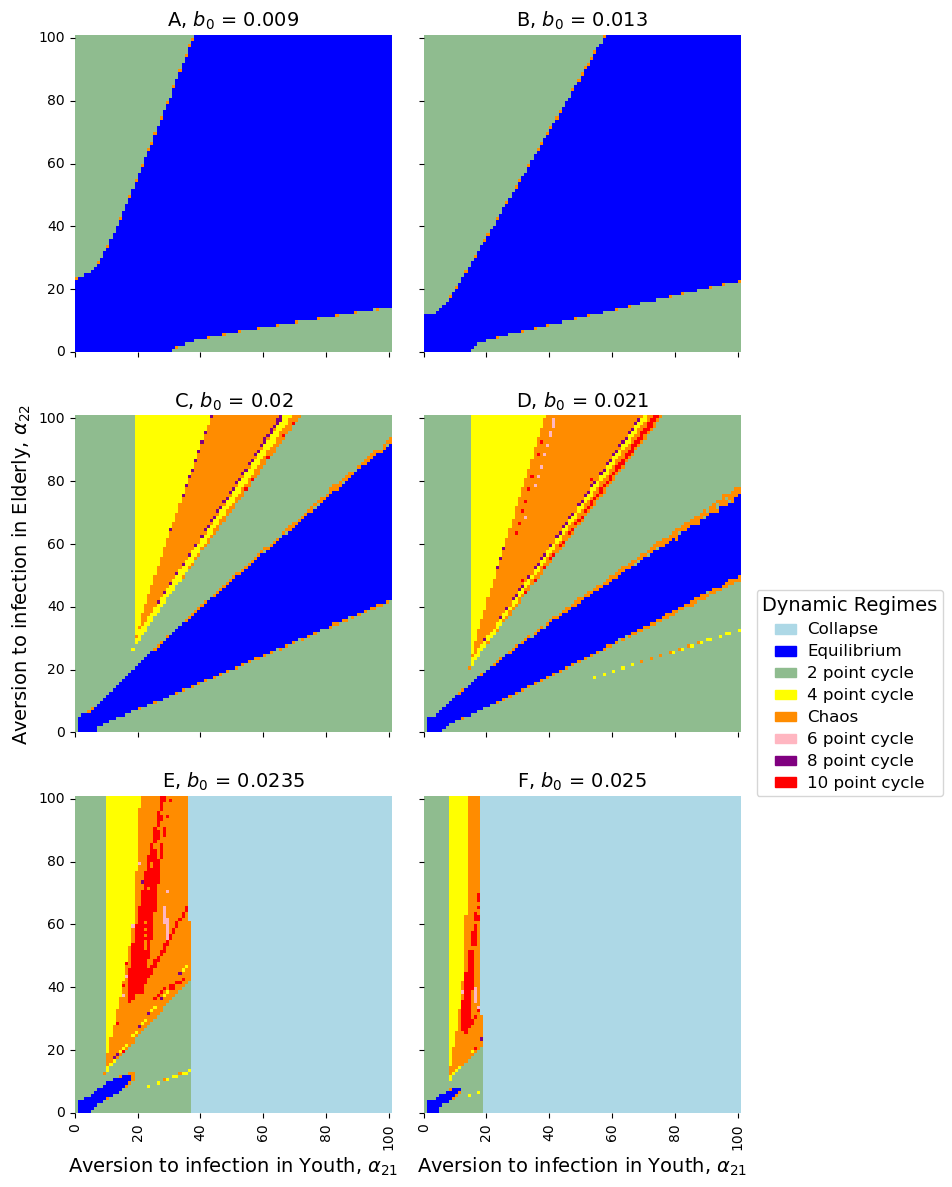

In [26]:
value_to_color = {
    0.0: 'lightblue',
    1.0: 'blue',
    2.0: 'darkseagreen',
    4.0: 'yellow',
    5.0: 'darkorange',
    6.0: 'lightpink',
    8.0: 'purple',
    10.0: 'red'
}
def convertor(x):
        return mapping[x]
    
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 14), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0)
titleArray = ["A","B","C","D","E","F"]

count = 0
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        matrix = a_values_young_array[count]
        
        matrix_np = matrix.values.astype(int)
        
        values = np.unique(matrix_np.ravel().astype(int))
        #print(values)
        n = len(values)
 
        cmap = ListedColormap([value_to_color[val] for val in sorted(values)])

        mapping = {v: i for i, v in enumerate(values)}
    
        matrix_np_new = np.vectorize(convertor)(matrix_np)


        ax = sns.heatmap(matrix_np_new, cmap=cmap,cbar=False,ax=axs[row, col])

    
        ax.invert_yaxis()
        
    
        nrows, ncols = matrix_np.shape
        x_ticks = np.arange(0, ncols, 20)
        y_ticks = np.arange(0, nrows, 20)
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

        # Update tick labels
        ax.set_xticklabels(x_ticks)
        ax.set_yticklabels(y_ticks)
        ax.set_box_aspect(1)
        
        # set the y-label 
        if col == 0 and row == 1:
            axs[row, col].set_ylabel(r'Aversion to infection in Elderly, $\alpha_{22}$', size = 14)

        # set the x-label 
        if row == axs.shape[0] - 1:
            axs[row, col].set_xlabel(r'Aversion to infection in Youth, $\alpha_{21}$', size = 14)
    

        axs[row, col].set_title(f'{titleArray[count]}, $b_0$ = {b0Array[count]}', size = 14)
        count += 1

allNames = ["Collapse", "Equilibrium", "2 point cycle", "4 point cycle", "Chaos", "6 point cycle", "8 point cycle", "10 point cycle"]
legend_patches = [mpatches.Patch(color=value_to_color[val], label=label) for val, label in zip(sorted(value_to_color.keys()), allNames)]
legend = plt.legend(handles=legend_patches,title="Dynamic Regimes", bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.,  handlelength=1.5)

plt.setp(legend.get_title(), fontsize=14)

for label in legend.get_texts():
    label.set_fontsize(12)

plt.savefig("6plots_frequency", dpi = 200, bbox_inches='tight')
plt.show()